In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\ridho\AppData\Roaming\Python\Python37\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must 

In [2]:
import tensorflow as tf

In [3]:
# Encoding the integer sequences into a binary mtrix
import numpy as np
def vectorize_seq(sequences, dimensions=10000):
    results =  np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)



In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [6]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'tanh', input_shape=(10000,)))
# model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


model

In [8]:
model

In [9]:
from keras import optimizers

model.compile(optimizer= 'rmsprop',
             loss='binary_crossentropy',
             metrics= ['accuracy'])

In [10]:
# Validating approach
"""
partial_x_train =x_train[:10000]
x_val = x_train[10000:]
partial_y_train = y_train[:10000]
y_val = y_train[10000:]

"""

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_test,
                    y_test,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_train, y_train))


Epoch 1/20
49/49 [==============================] - 43s 154ms/step - loss: 0.5145 - acc: 0.7520 - val_loss: 0.3286 - val_acc: 0.8748
Epoch 2/20
49/49 [==============================] - 5s 94ms/step - loss: 0.2504 - acc: 0.9168 - val_loss: 0.2905 - val_acc: 0.8828
Epoch 3/20
49/49 [==============================] - 5s 93ms/step - loss: 0.1844 - acc: 0.9381 - val_loss: 0.2864 - val_acc: 0.8866
Epoch 4/20
49/49 [==============================] - 5s 94ms/step - loss: 0.1493 - acc: 0.9474 - val_loss: 0.3037 - val_acc: 0.8832
Epoch 5/20
49/49 [==============================] - 5s 93ms/step - loss: 0.1280 - acc: 0.9572 - val_loss: 0.3323 - val_acc: 0.8771
Epoch 6/20
49/49 [==============================] - 5s 93ms/step - loss: 0.1065 - acc: 0.9636 - val_loss: 0.3926 - val_acc: 0.8645
Epoch 7/20
49/49 [==============================] - 5s 94ms/step - loss: 0.0923 - acc: 0.9707 - val_loss: 0.3958 - val_acc: 0.8687
Epoch 8/20
49/49 [==============================] - 5s 100ms/step - loss: 0.0825 

In [11]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

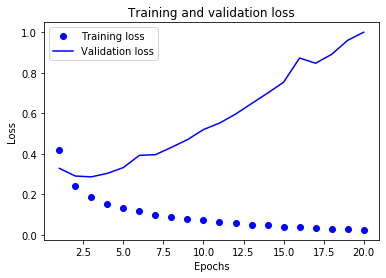

In [12]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict ['val_loss']

epochs = range(1, len(history_dict['acc'])+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

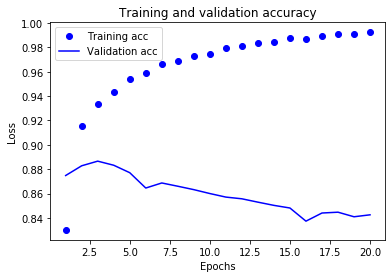

In [13]:
#Plotting the training and validation accuracy

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
"""
1. we usually need to do quite a bit of preprocessing on our raw data in order to
be able to feed it—as tensors—into a neural network. Sequences of words can
be encoded as binary vectors, but there are other encoding options, too.

2. Stacks of Dense layers with relu activations can solve a wide range of problems
(including sentiment classification), and you’ll likely use them frequently.

3. In a binary classification problem (two output classes), your network should
end with a Dense layer with one unit and a sigmoid activation: the output of
your network should be a scalar between 0 and 1, encoding a probability.

4 With such a scalar sigmoid output on a binary classification problem, the loss
function you should use is binary_crossentropy.

5 The rmsprop optimizer is generally a good enough choice, whatever your problem.
That’s one less thing for you to worry about.

6 As they get better on their training data, neural networks eventually start overfitting
and end up obtaining increasingly worse results on data they’ve never
seen before. Be sure to always monitor performance on data that is outside of
the training set.

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-14-c81c768c7a26>, line 18)